In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\survey.csv")

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df=df.drop(['Timestamp','Country','state','comments','no_employees'],axis=1)

In [7]:
df.shape

(1259, 22)

In [8]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [9]:
for col in df.columns:
  print(col)

Age
Gender
self_employed
family_history
treatment
work_interfere
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence


In [11]:
for col in df.columns:
    print("---------------------------------------------\n")
    print(f"{col} : {df[col].unique()}\n")

---------------------------------------------

Age : [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

---------------------------------------------

Gender : ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'G

In [12]:
L=list(df['Gender'])

In [13]:
L=[l.lower() for l in L]

In [14]:
for i in range(0,len(L)):
  if (('f' in L[i]) or('woman' in L[i]) and ('tr' not in L[i]) ):
    L[i]='female'
  elif (('m' in L[i]) or('guy' in L[i]) and ('tr' not in L[i]) ):
    L[i]='male'
  else:
    L[i]='other'
    

In [15]:
df['Gender']=L

In [16]:
df['Gender'].unique()

array(['female', 'male', 'other'], dtype=object)

In [17]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   remote_work                1259 non-null   object
 7   tech_company               1259 non-null   object
 8   benefits                   1259 non-null   object
 9   care_options               1259 non-null   object
 10  wellness_program           1259 non-null   object
 11  seek_help                  1259 non-null   object
 12  anonymity                  1259 non-null   object
 13  leave                      1259 non-null   object
 14  mental_h

In [19]:
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [20]:
X = df.iloc[:,1:22]

In [21]:
X.head()

,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,female,No,No,Yes,Often,No,Yes,Yes,Not sure,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,male,No,No,No,Rarely,No,No,Don't know,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,male,No,No,No,Rarely,No,Yes,No,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,male,No,Yes,Yes,Often,No,Yes,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,male,No,No,No,Never,Yes,Yes,Yes,No,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [22]:
#visualisation

In [23]:
# for i in X:
#   le = LabelEncoder()
#   df[i]=le.fit_transform(df[i])

In [24]:
labelDict = {}
for i in X:
  le = LabelEncoder()
  df[i]=le.fit_transform(df[i])
  label_name="label_"+i
  label_value=le.classes_
  labelDict[label_name]=label_value


Text(0.5, 1.0, 'treated or not')

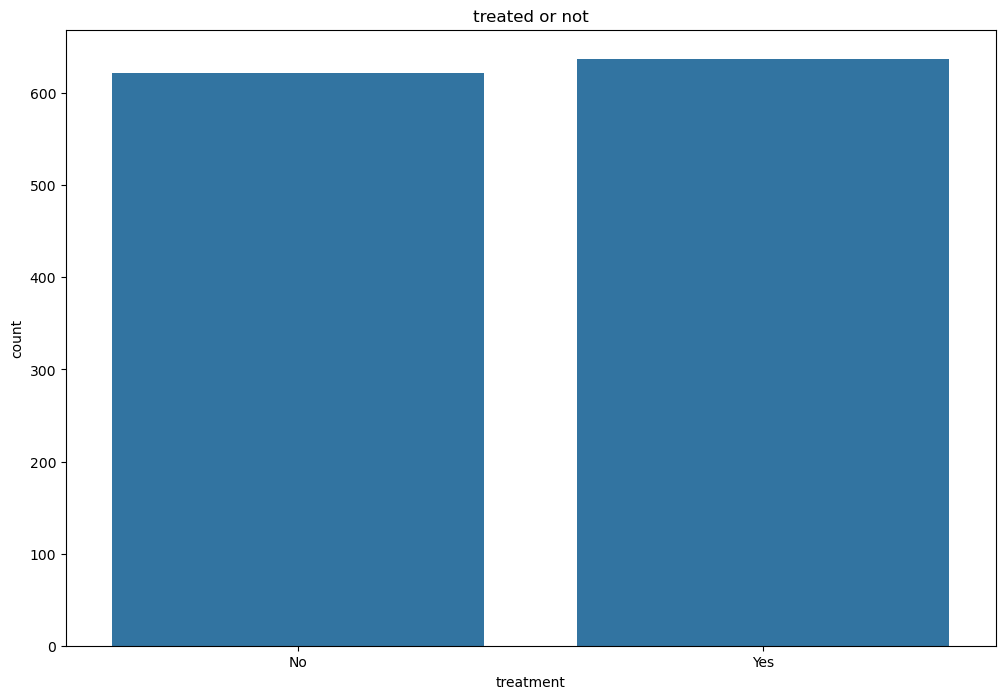

In [25]:
plt.figure(figsize=(12,8))
labels = labelDict['label_treatment']
g = sns.countplot(x=df['treatment'])
g.set_xticklabels(labels)

plt.title('treated or not')

Text(0.5, 1.0, 'Gender distribution')

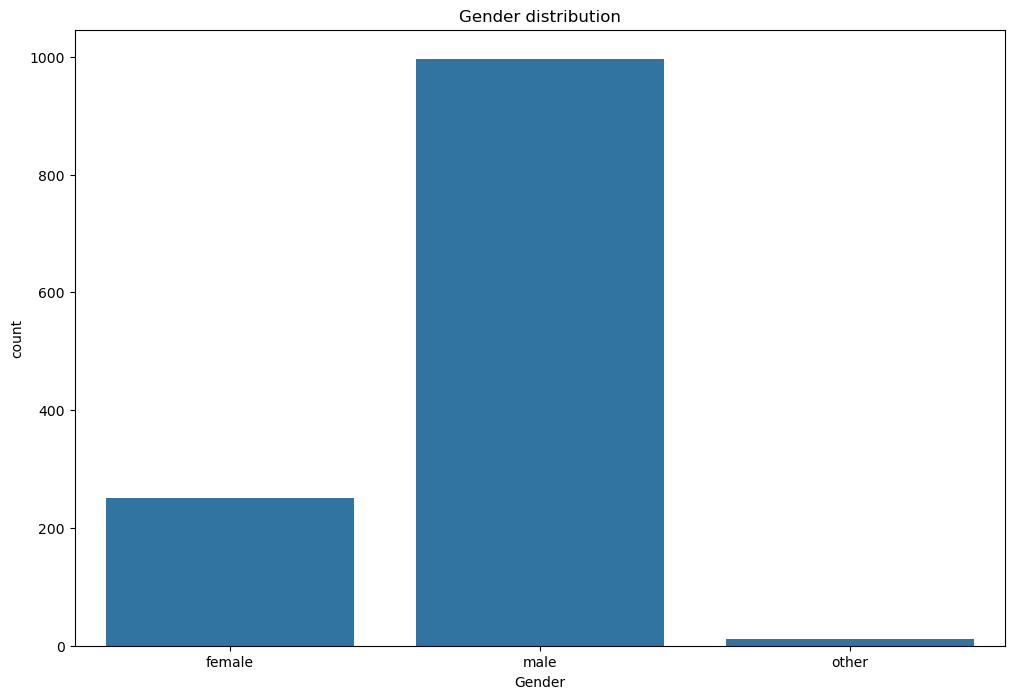

In [26]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x=df['Gender'])
g.set_xticklabels(labels)

plt.title('Gender distribution')

Text(0.5, 1.0, 'how easy is to ask for leave for mental health issues')

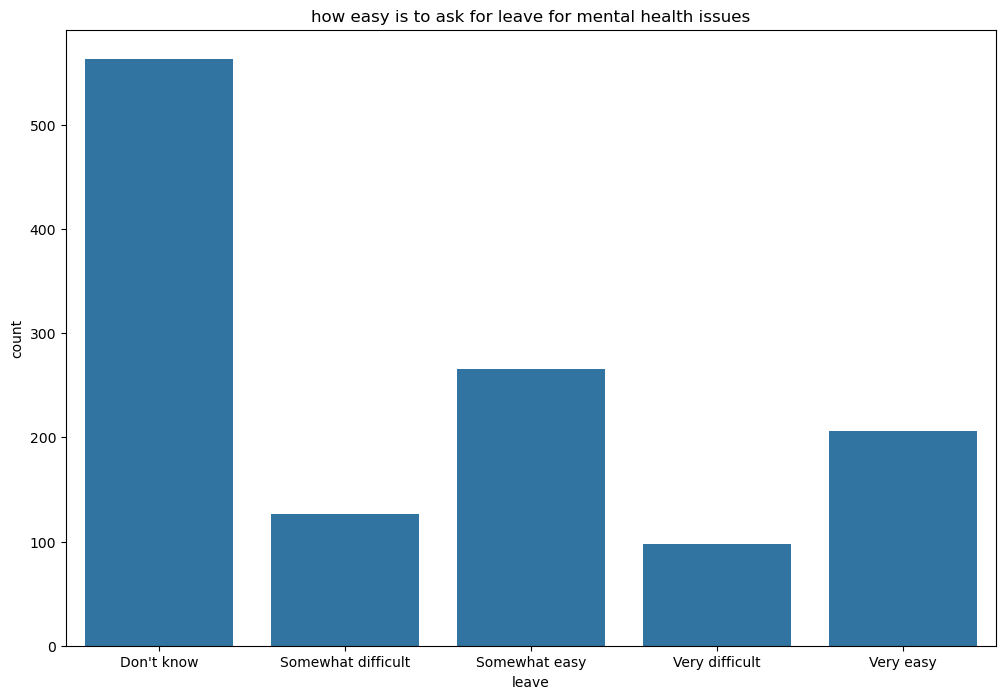

In [27]:
plt.figure(figsize=(12,8))
labels = labelDict['label_leave']
g = sns.countplot(x=df['leave'])
g.set_xticklabels(labels)

plt.title('how easy is to ask for leave for mental health issues')

Text(0, 0.5, 'count')

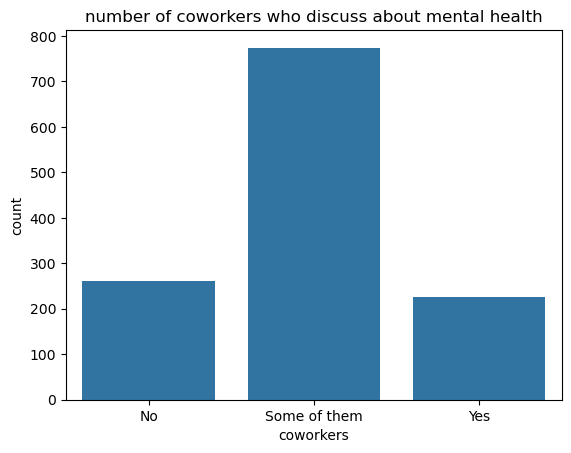

In [28]:
g=sns.countplot(data=df, x="coworkers")
labels=labelDict['label_coworkers']
g.set_xticklabels(labels)
plt.title('number of coworkers who discuss about mental health')
plt.ylabel('count')

Text(0, 0.5, 'count')

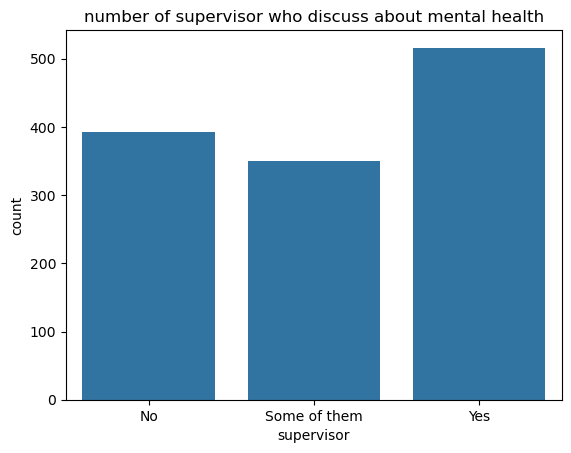

In [29]:
g=sns.countplot(data=df, x="supervisor")
labels=labelDict['label_supervisor']
g.set_xticklabels(labels)
plt.title('number of supervisor who discuss about mental health')
plt.ylabel('count')

Text(0, 0.5, 'count ')

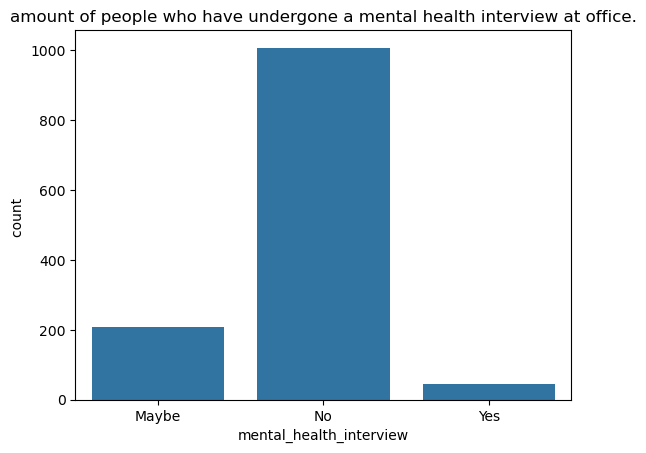

In [30]:
g=sns.countplot(data=df, x="mental_health_interview")
labels=labelDict['label_mental_health_interview']
g.set_xticklabels(labels)
plt.title('amount of people who have undergone a mental health interview at office.')
plt.ylabel('count ')

Text(0, 0.5, 'count')

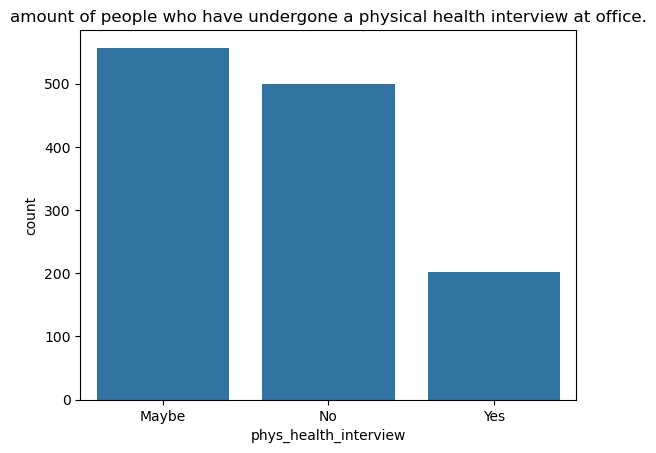

In [31]:
g=sns.countplot(data=df, x="phys_health_interview")
labels=labelDict['label_phys_health_interview']
g.set_xticklabels(labels)
plt.title('amount of people who have undergone a physical health interview at office.')
plt.ylabel('count')

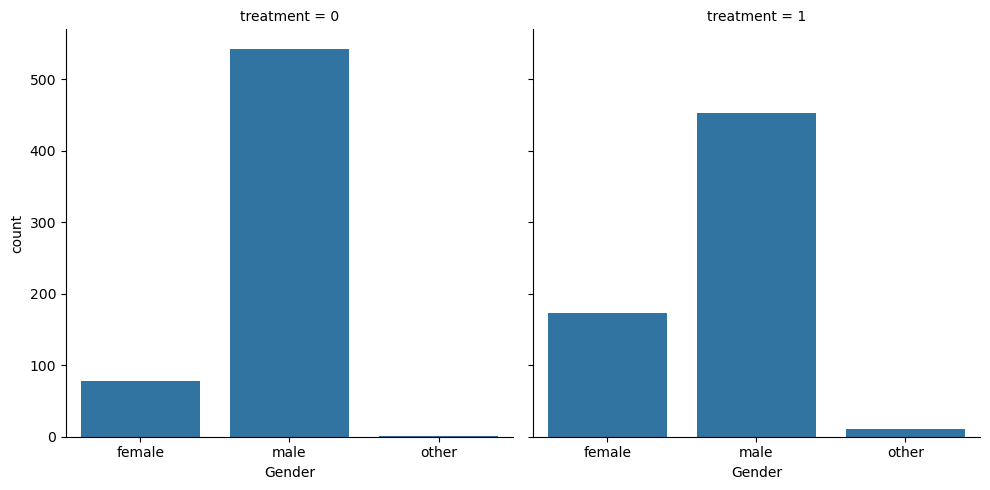

In [32]:



g = sns.FacetGrid(df, col='treatment',height=5)
g = g.map(sns.countplot, "Gender")
labels=labelDict['label_Gender']
g.set_xticklabels(labels)

In [33]:
#overall we can observe highest number of people who took treatment were males followed by females and others.
#But it can also be observed that there is a relative decrease in the number of males who took treatment with respect to those who dont.
#On the other hand number of people who took treatment under the category of both females, and others have increased with respect to those who didn't.

Text(0.5, 29.140624999999986, 'family history')

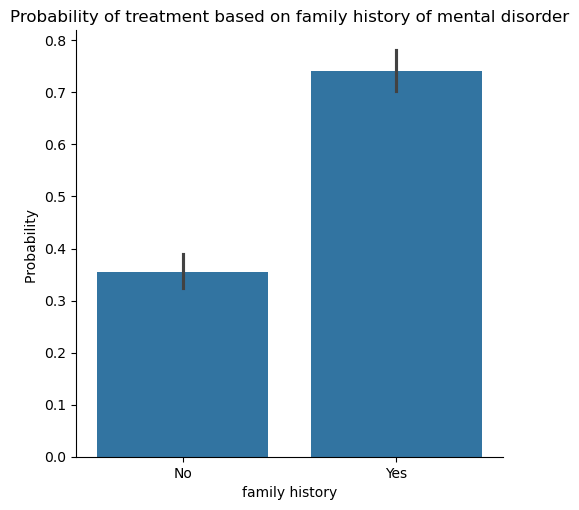

In [34]:
g=sns.catplot(x="family_history", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_family_history']
g.set_xticklabels(labels)
plt.title('Probability of treatment based on family history of mental disorder')
plt.ylabel('Probability ')
plt.xlabel('family history')

Text(30.47561728395062, 0.5, 'Probability ')

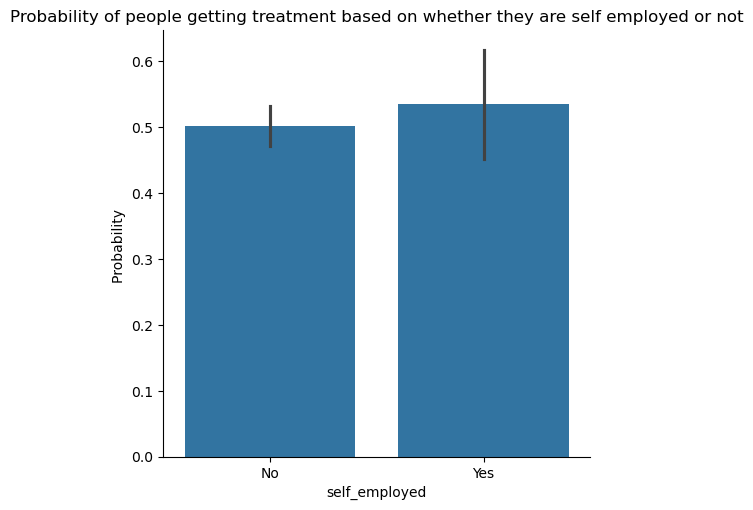

In [35]:
g=sns.catplot(x="self_employed", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_self_employed']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they are self employed or not')
plt.ylabel('Probability ')

Text(30.47561728395062, 0.5, 'Probability ')

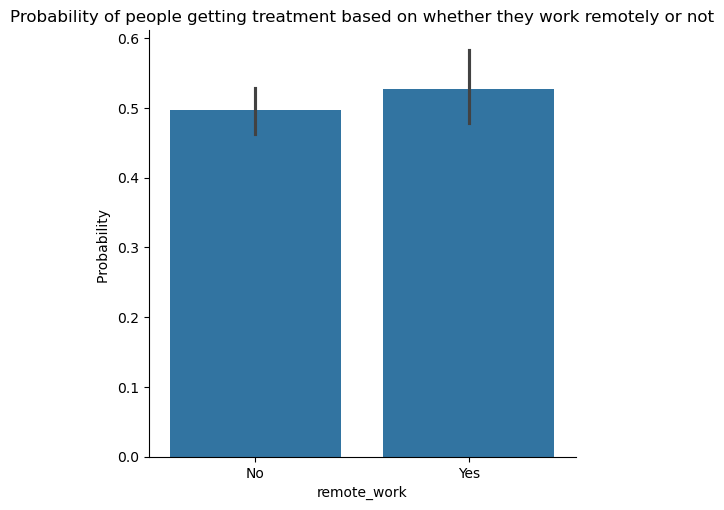

In [36]:
g=sns.catplot(x="remote_work", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_remote_work']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they work remotely or not')
plt.ylabel('Probability ')

Text(30.47561728395062, 0.5, 'Probability ')

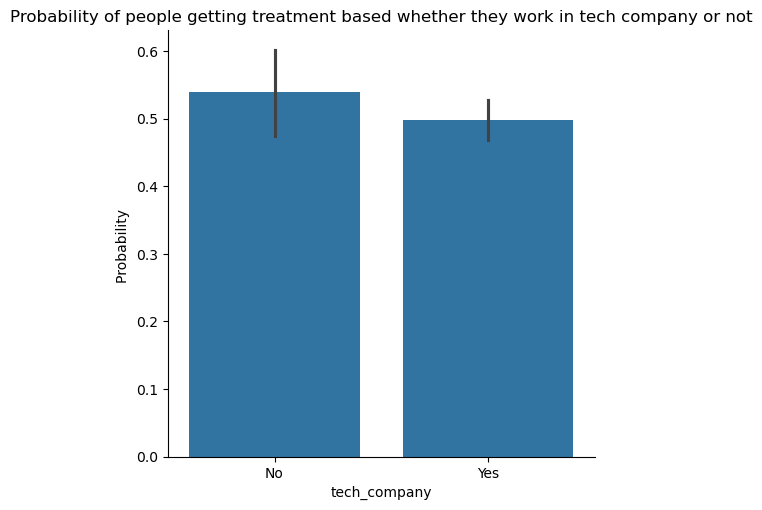

In [37]:
g=sns.catplot(x="tech_company", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_tech_company']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based whether they work in tech company or not')
plt.ylabel('Probability ')


Text(30.47561728395062, 0.5, 'Probability ')

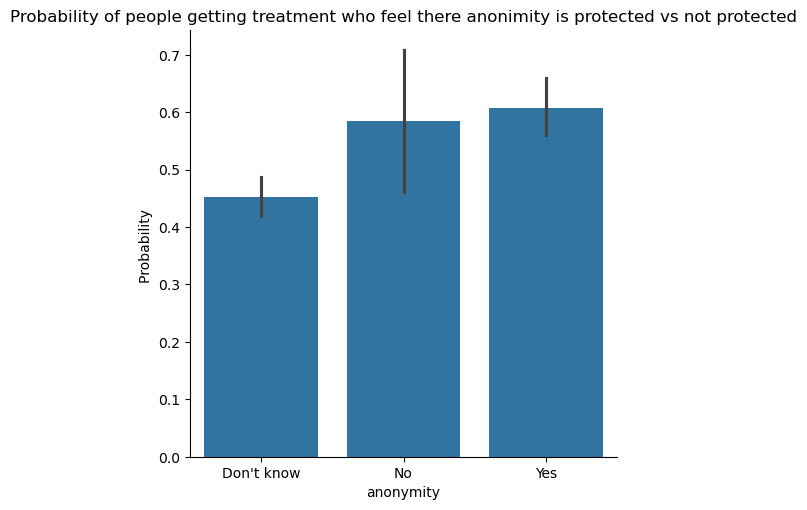

In [38]:
g=sns.catplot(x="anonymity", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_anonymity']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment who feel there anonimity is protected vs not protected')
plt.ylabel('Probability ')

Text(30.47561728395062, 0.5, 'Probability ')

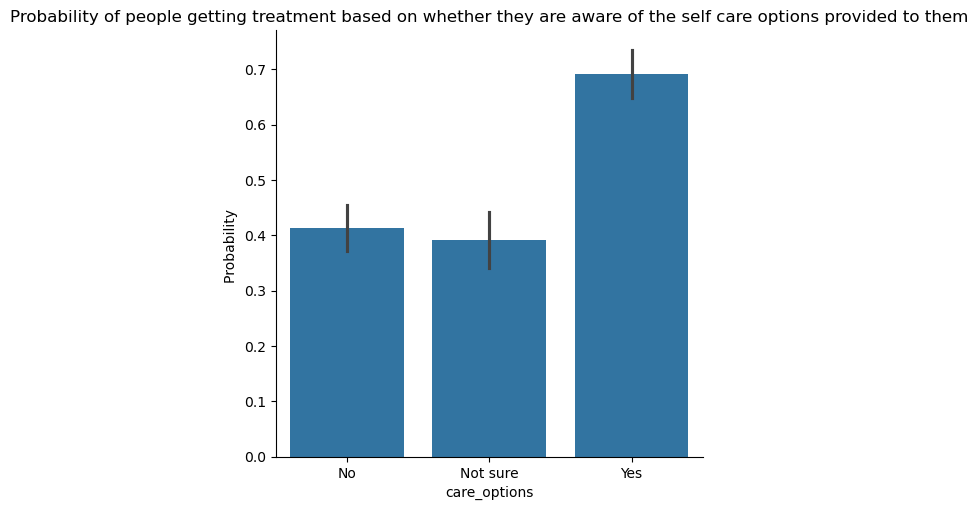

In [39]:
g=sns.catplot(x="care_options", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_care_options']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether they are aware of the self care options provided to them')
plt.ylabel('Probability ')

Text(30.47561728395062, 0.5, 'Probability ')

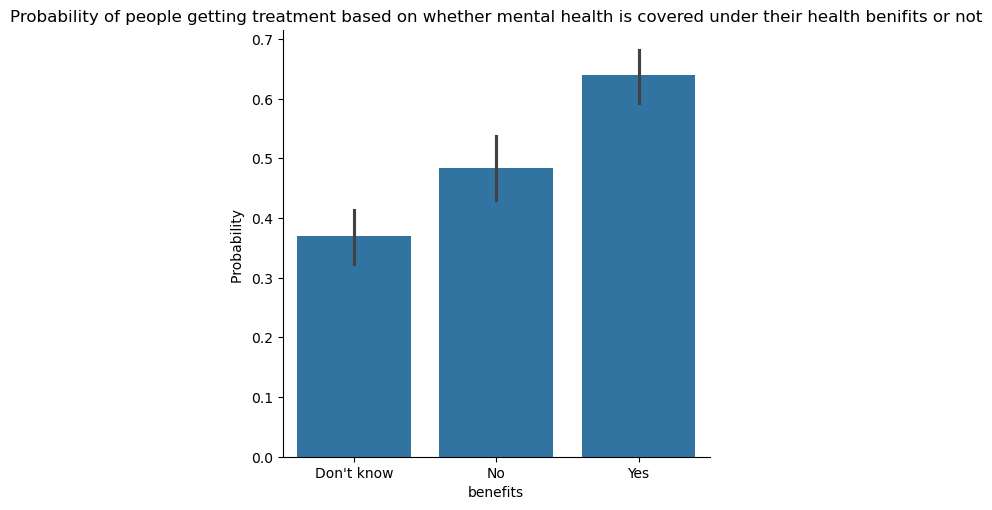

In [40]:
g=sns.catplot(x="benefits", y="treatment", data=df, kind="bar",height=5)
labels=labelDict['label_benefits']
g.set_xticklabels(labels)
plt.title('Probability of people getting treatment based on whether mental health is covered under their health benifits or not')
plt.ylabel('Probability ')

In [41]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


<Axes: >

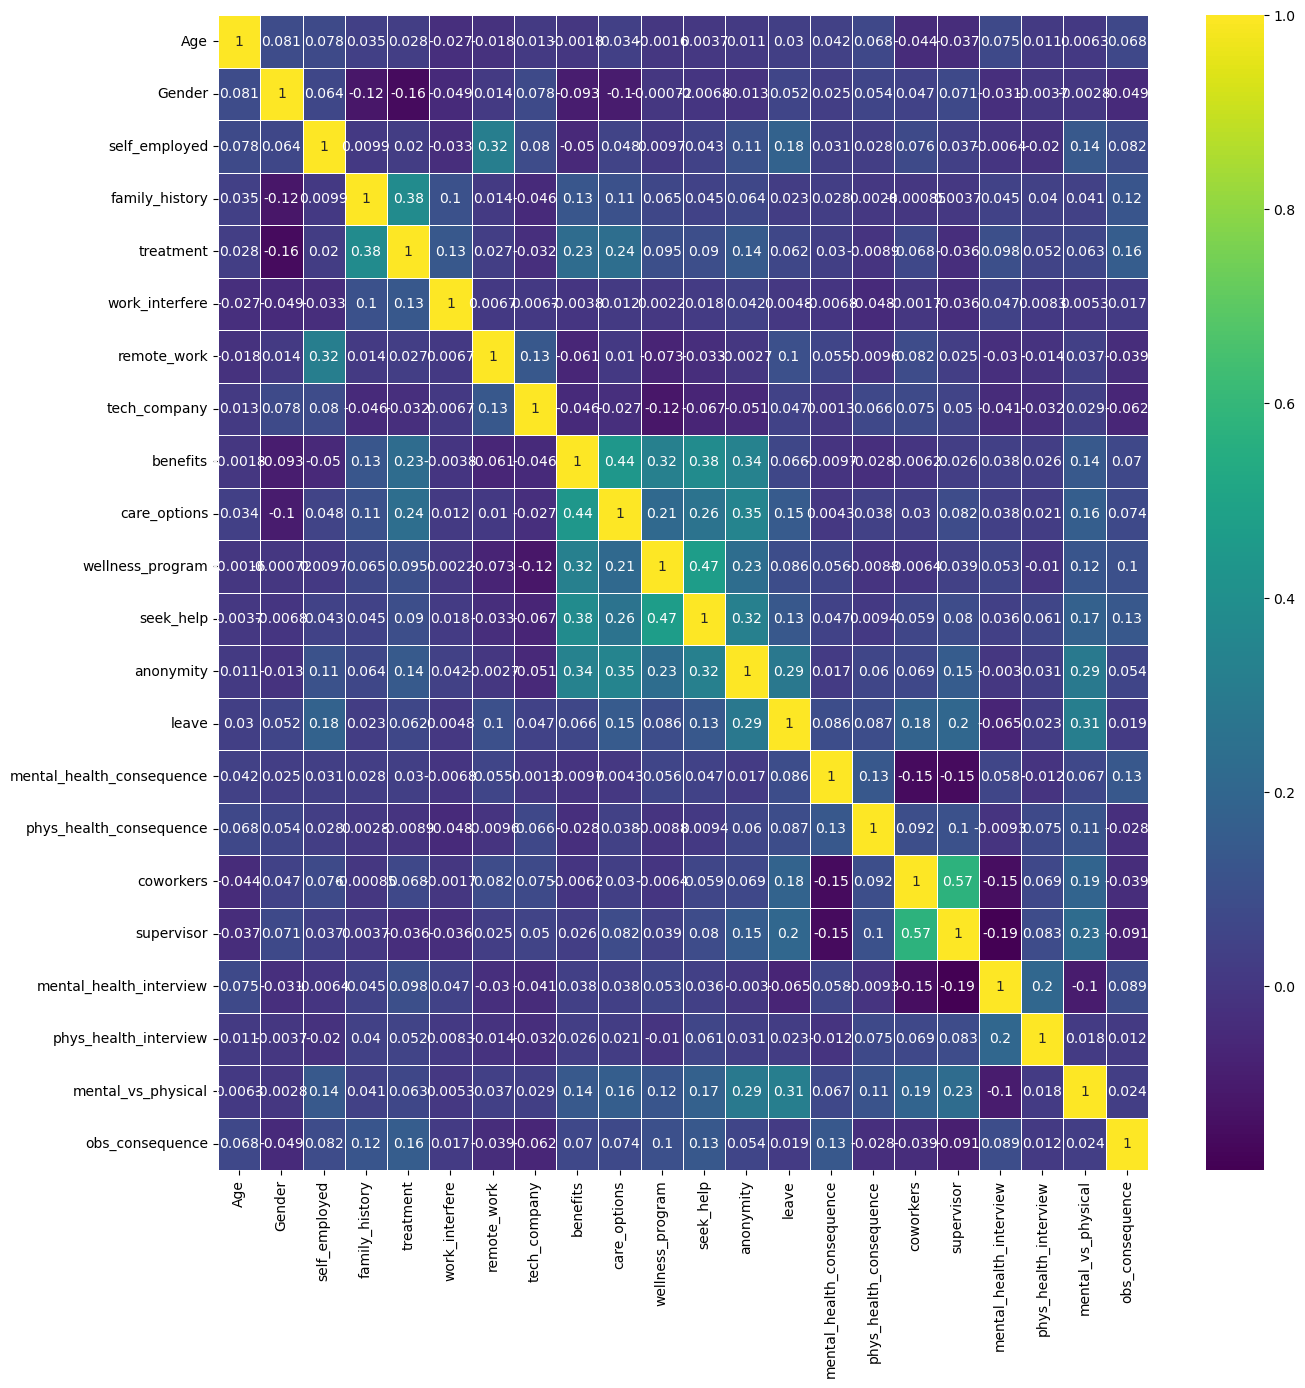

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [43]:
#Feature Selection

In [44]:
df.shape

(1259, 22)

In [45]:
target_column = 'treatment'

In [46]:
corr_matrix = df.corr()[target_column]

In [47]:
low_corr_cols = corr_matrix[abs(corr_matrix) < 0.1].index.tolist()

In [48]:
low_corr_cols

['Age',
 'self_employed',
 'remote_work',
 'tech_company',
 'wellness_program',
 'seek_help',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical']

In [49]:
df.drop(low_corr_cols, axis=1, inplace=True)

In [50]:
df.columns

Index(['Gender', 'family_history', 'treatment', 'work_interfere', 'benefits',
       'care_options', 'anonymity', 'obs_consequence'],
      dtype='object')

In [51]:
df.head()

,Gender,family_history,treatment,work_interfere,benefits,care_options,anonymity,obs_consequence
0,0,0,1,1,2,1,2,0
1,1,0,0,2,0,0,0,0
2,1,0,0,2,1,0,0,0
3,1,1,1,1,1,2,1,1
4,1,0,0,0,2,0,0,0


In [52]:
df.shape

(1259, 8)

In [53]:
#Models

In [54]:
X=df.copy()
X.drop(['treatment'],axis=1,inplace=True)
Y=df['treatment']
X.head()

,Gender,family_history,work_interfere,benefits,care_options,anonymity,obs_consequence
0,0,0,1,2,1,2,0
1,1,0,2,0,0,0,0
2,1,0,2,1,0,0,0
3,1,1,1,1,2,1,1
4,1,0,0,2,0,0,0


In [55]:
X.shape

(1259, 7)

In [56]:
df['treatment'].value_counts()

treatment
1    637
0    622
Name: count, dtype: int64

In [57]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,test_size=0.2,random_state=70)

Model accuracy on train is:  0.7229394240317776
Model accuracy on test is:  0.6944444444444444
--------------------------------------------------
Model precision score on test is:  0.7
--------------------------------------------------
Model recall score on test is:  0.636
--------------------------------------------------
Model F1 score on test is:  0.667
--------------------------------------------------


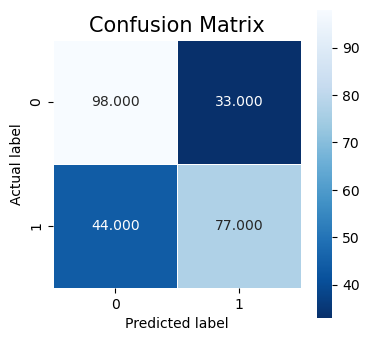

In [58]:
#fit the model on train data 
log_reg = LogisticRegression(max_iter=3000).fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds2),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds2),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds2),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

Model accuracy on train is:  0.7586891757696127
Model accuracy on test is:  0.7420634920634921
--------------------------------------------------
Model precision score on test is:  0.73
--------------------------------------------------
Model recall score on test is:  0.736
--------------------------------------------------
Model F1 score on test is:  0.733
--------------------------------------------------


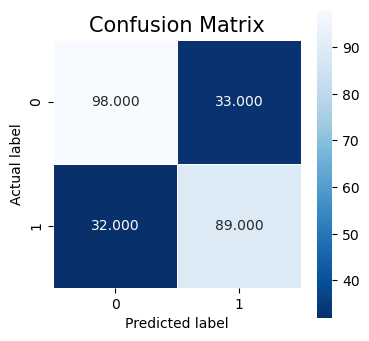

In [59]:
#fit the model on train data 
DT2 = DecisionTreeClassifier(max_depth= 4, min_samples_split= 10).fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds3),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds3),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds3),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds3)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [60]:
param_grid = {'max_depth': np.arange(1, 10),
              'min_samples_split': [2, 5, 10, 15, 20],
              }


In [61]:
grid_search = GridSearchCV(DT2, param_grid, cv=5)
grid_search.fit(X,Y)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'min_samples_split': 10}


Model accuracy on train is:  0.7666335650446872
Model accuracy on test is:  0.746031746031746
--------------------------------------------------
Model precision score on test is:  0.757
--------------------------------------------------
Model recall score on test is:  0.694
--------------------------------------------------
Model F1 score on test is:  0.724
--------------------------------------------------


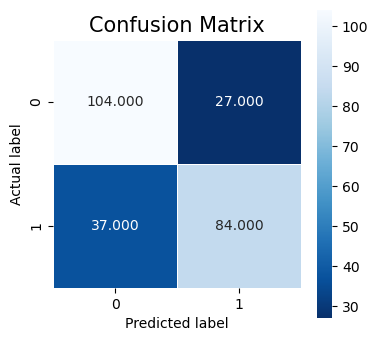

In [62]:
#fit the model on train data 
RF=RandomForestClassifier(max_depth= 5, min_samples_split=5, n_estimators=100).fit(X_train2,Y_train2)
#predict on train  
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds4),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds4),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds4),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds4)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [63]:
param_grid = {'n_estimators': [100,150 ,200, 300,400],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Best score:  0.7553563523683046


Model accuracy on train is:  0.7686196623634558
Model accuracy on test is:  0.75
--------------------------------------------------
Model precision score on test is:  0.727
--------------------------------------------------
Model recall score on test is:  0.769
--------------------------------------------------
Model F1 score on test is:  0.747
--------------------------------------------------


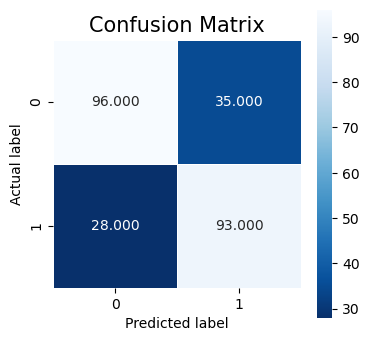

In [64]:
#fit the model on train data 
ada_clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 165).fit(X_train2,Y_train2)
#predict on train 
train_preds_ada = ada_clf.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_ada))
#predict on test
test_preds_ada = ada_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_ada))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_ada),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_ada),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_ada),3))
print('-'*50)

cm = confusion_matrix(Y_test2, test_preds_ada)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [65]:
parameters = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(ada_clf, parameters, cv=5)
grid.fit(X, Y)

# Print the best hyperparameters
print('Best hyperparameters:', grid.best_params_)

# Use cross-validation to evaluate the model with the best hyperparameters
best_model = AdaBoostClassifier(n_estimators=grid.best_params_['n_estimators'], 
                                learning_rate=grid.best_params_['learning_rate'])

scores = cross_val_score(best_model, X, Y, cv=5)
print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-validation scores: [0.75       0.79761905 0.75396825 0.76587302 0.74103586]
Average score: 0.7616992348068046
